In [61]:
import pandas as pd

In [62]:
dataset_red=pd.read_csv("C:/Users/10253/Desktop/Machine-Learning-Project-Group-6/Data/红酒白酒分类+回归（都可以）/winequality-red.csv",sep=";",index_col=False)
dataset_white=pd.read_csv("C:/Users/10253/Desktop/Machine-Learning-Project-Group-6/Data/红酒白酒分类+回归（都可以）/winequality-white.csv",sep=";",index_col=False)


In [63]:
# dataset_red.head(n=len(dataset_red))
red=["red"]*len(dataset_red)
dataset_red.insert(0,"Label",red)
white=["white"]*len(dataset_white)
dataset_white.insert(0,"Label",white)
# dataset_white.head(n=5)
dataset=pd.concat([dataset_red,dataset_white],axis=0)
dataset.set_index("Label")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Label,,,,,,,,,,,,
red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6


IndexError: index 9 is out of bounds for axis 0 with size 9

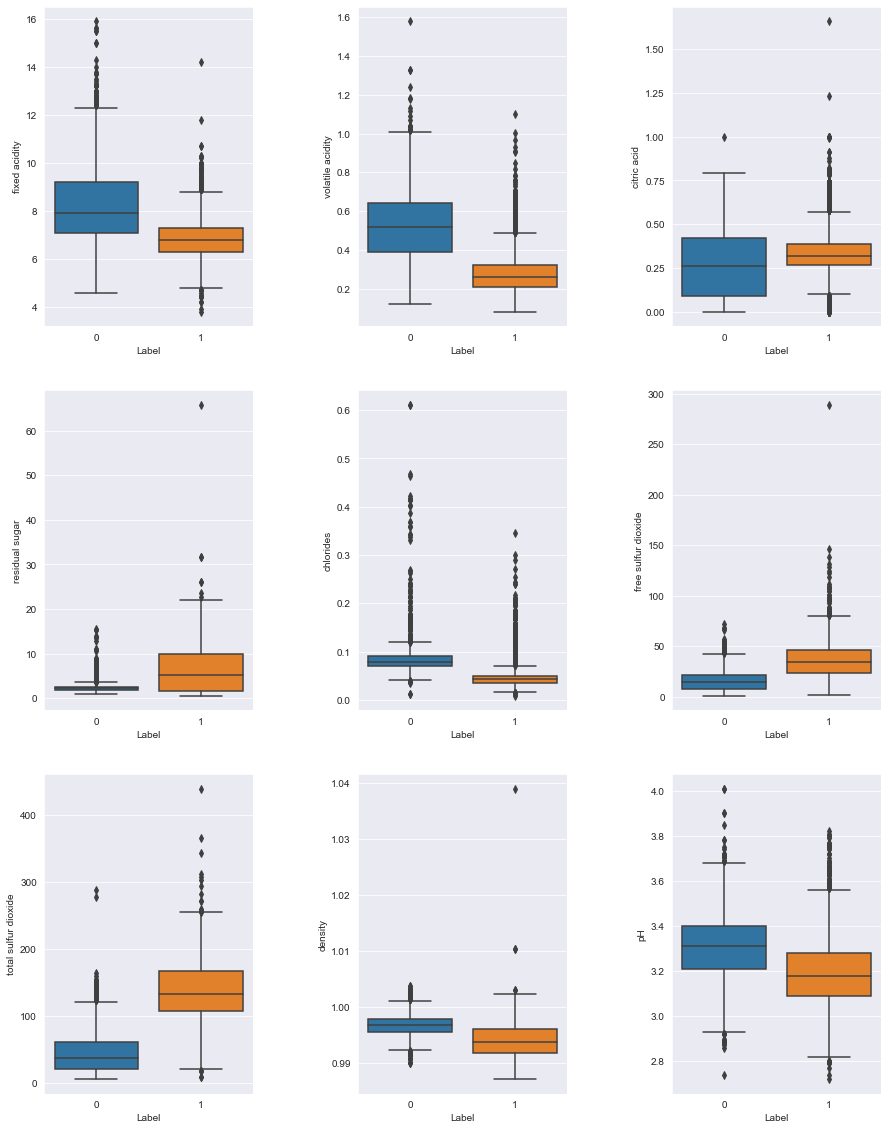

In [73]:
from matplotlib import pyplot as plt
import seaborn as sns
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,20))
fig.subplots_adjust(hspace=0.2,wspace=.5)
axes=axes.ravel()

for i,col in enumerate(dataset.columns[1:]):
    _=sns.boxplot(y=col,x='Label',data=dataset,ax=axes[i])

In [64]:
X=dataset.drop("Label",axis=1)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xs=scaler.fit_transform(X)

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["Label"]=le.fit_transform(dataset["Label"])

y=dataset["Label"]

In [66]:
from sklearn.feature_selection import SelectKBest,chi2
X=SelectKBest(chi2,k=3).fit_transform(X,y)

In [67]:
from sklearn.model_selection import train_test_split

Xs_train,Xs_test,y_train,y_test=train_test_split(Xs,y,test_size=0.3,random_state=1,stratify=y)



In [68]:
from sklearn.svm import SVC

clf=SVC(C=1.0,kernel="rbf",degree=3,gamma='auto',probability=True)
clf.fit(Xs_train,y_train)

SVC(gamma='auto', probability=True)

In [69]:
classifier_score=clf.score(Xs_test,y_test)
print('The classifier accuracy score is {:03.2f}'.format(classifier_score))


The classifier accuracy score is 0.99


In [70]:
from sklearn.metrics import accuracy_score
y_predict=clf.predict(Xs_test)
accuracy=accuracy_score(y_test,y_predict)

print(accuracy)

0.9948717948717949
